In [34]:
from Train import Trainer, Tester
from LinUCB_Algo import  LinUCB
from learn_bayesian_network import Bayesian_Model_Bandit
from binary_value_graph import  Binary_Graph
from matplotlib import pyplot as plt


In [35]:
num_node = 10
bmb = Bayesian_Model_Bandit(num_node)
bmb.collect_data()
bmb.data = bmb.data.iloc[:50]
bmb.learn()

In [36]:
ucb = LinUCB(num_arms=  bmb.node_number - 1, num_features= bmb.node_number - 1, alpha= 1.2)
trainer = Trainer(bmb, ucb)

In [37]:
trainer.train(n_rounds= 200, show_progress=True)

100%|██████████| 200/200 [00:19<00:00, 10.20it/s]


In [38]:
bmb.simulate(n_samples=1)

  0%|          | 0/10 [00:00<?, ?it/s]

,Y,x_6,x_4,x_3,x_8,x_2,x_5,x_9,x_1,x_7
0,0,0,0,0,0,0,0,0,1,0


In [39]:
print(bmb.get_cpds('x_2'))

+--------+------+
| x_2(0) | 0.58 |
+--------+------+
| x_2(1) | 0.42 |
+--------+------+


In [40]:
algo = trainer.algo
algo.theta

[array([[ 0.06467214],
        [-0.1010385 ],
        [ 0.18648071],
        [ 0.13999175],
        [ 0.13999175],
        [-0.14175383],
        [ 0.04285232],
        [ 0.12158362],
        [-0.01533386]]),
 array([[ 0.01432786],
        [-0.16465041],
        [ 0.30224023],
        [ 0.10174899],
        [ 0.10174899],
        [ 0.11702263],
        [ 0.0007905 ],
        [ 0.17204726],
        [-0.02505611]]),
 array([[-0.1984127 ],
        [ 0.11287478],
        [ 0.16093474],
        [ 0.06613757],
        [ 0.06613757],
        [ 0.2319224 ],
        [-0.01940035],
        [-0.04276896],
        [-0.13536155]]),
 array([[ 0.06374641],
        [ 0.03637769],
        [ 0.22220911],
        [-0.0740575 ],
        [-0.0740575 ],
        [-0.08063722],
        [-0.14418425],
        [ 0.08567883],
        [ 0.38955871]]),
 array([[ 0.00982639],
        [ 0.14194413],
        [ 0.2732286 ],
        [ 0.09438049],
        [-0.16638629],
        [-0.03436288],
        [ 0.11659205],
   

In [41]:
import os
env = Binary_Graph(num_node=num_node)
test = Tester(env, algo,bmb, 50, 100)
dic_path = os.path.join('/Users/liuanjie/PycharmProjects/pythonProject19/CAUSAL/causal_bandit/model/data/', f'{num_node}_node_env.json')
test.load_dic(dic_path = dic_path)
test.test(n_rounds=500, compare=True, online_update=True)

100%|██████████| 500/500 [02:12<00:00,  3.77it/s]


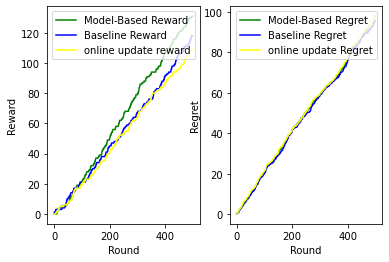

In [42]:
test.plot_compare()

In [43]:
test.model.data

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
950,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0


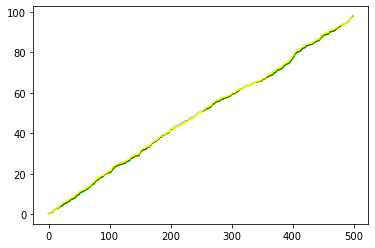

In [44]:
plt.plot(test.regret_list, color="green", label="Model-Based Regret")
#plt.plot(test.baseline_regret_list, color="blue", label="Baseline Regret")
plt.plot(test.online_regret_list, color='yellow', label='online update Regret')